In [ ]:
#check environment
import sys
print(sys.executable)

In [3]:
import plotly
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from collections import Counter

from scipy.special import expit

from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score, GridSearchCV
from sklearn import tree

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from optbinning import BinningProcess, OptimalBinning # Para cáclulos WOE e IV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2, l1

from tabulate import tabulate

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv('vacuum_sensor_data.csv', sep = ';')
data

,momento,1-0005,5-0005,1-_006,5-_006,1-_007,5-_007,1-_008,5-_008,1-_010,...,1-_098,5-_098,1-_099,5-_099,1-0112,5-0112,1-0116,5-0116,1-0109,5-0109
0,1,-588.88,-580.21,-590.50,-582.25,-593.51,-585.46,-595.51,-587.47,-575.36,...,-588.17,-581.42,-594.26,-586.26,-589.46,-581.75,-592.92,-586.26,-593.93,-586.30
1,2,-588.38,-579.71,-590.80,-582.46,-593.80,-585.67,-595.55,-587.59,-574.11,...,-588.34,-581.63,-594.51,-586.26,-589.29,-581.58,-592.80,-586.26,-594.13,-586.51
2,3,-584.41,-575.74,-585.83,-577.66,-591.38,-583.21,-589.84,-578.04,-563.34,...,-588.17,-581.33,-592.88,-584.34,-588.50,-580.62,-590.21,-583.75,-593.68,-585.84
3,4,-573.73,-565.27,-570.31,-562.81,-578.91,-571.24,-578.61,-565.90,-555.00,...,-584.79,-576.87,-580.62,-568.15,-586.96,-578.75,-578.66,-571.19,-590.88,-582.63
4,5,-567.27,-558.55,-562.26,-554.55,-570.69,-562.93,-567.18,-557.51,-545.99,...,-579.11,-570.99,-572.11,-560.43,-583.45,-574.91,-571.06,-563.56,-587.38,-578.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,637,-237.18,-253.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,638,-237.10,-253.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,639,-237.14,-253.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,640,-237.10,-253.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,momento,1-0005,5-0005,1-_006,5-_006,1-_007,5-_007,1-_008,5-_008,1-_010,...,1-_098,5-_098,1-_099,5-_099,1-0112,5-0112,1-0116,5-0116,1-0109,5-0109
count,641.000000,641.000000,641.000000,629.000000,629.000000,583.000000,583.000000,599.000000,599.000000,609.000000,...,635.000000,635.000000,635.000000,635.000000,592.000000,592.000000,620.000000,620.000000,607.000000,607.000000
mean,321.000000,-342.349189,-339.610203,-354.630175,-345.826296,-296.604220,-302.286895,-352.617896,-342.724424,-258.067422,...,-315.100961,-320.353339,-363.575496,-395.629748,-346.702416,-336.187416,-378.188645,-378.797161,-351.085371,-348.636919
std,185.185043,126.782420,113.591201,121.461234,116.447982,156.920938,143.221582,113.500372,110.448237,128.392207,...,134.499994,125.978392,118.740441,89.710097,112.288884,109.350093,107.373020,95.966318,122.238057,101.510396
min,1.000000,-588.880000,-580.210000,-590.800000,-582.460000,-593.800000,-585.670000,-595.550000,-587.590000,-575.360000,...,-588.340000,-581.630000,-594.510000,-586.260000,-589.460000,-581.750000,-592.920000,-586.260000,-594.130000,-586.510000
25%,161.000000,-491.340000,-474.430000,-501.310000,-483.650000,-487.100000,-468.130000,-485.430000,-455.030000,-373.980000,...,-468.060000,-472.555000,-485.685000,-486.925000,-459.615000,-450.197500,-498.977500,-487.825000,-487.185000,-458.325000
50%,321.000000,-262.130000,-264.180000,-293.840000,-265.220000,-204.310000,-204.840000,-296.510000,-272.980000,-195.000000,...,-236.180000,-234.720000,-309.360000,-352.090000,-280.295000,-261.460000,-334.555000,-333.170000,-269.600000,-276.650000
75%,481.000000,-235.050000,-252.240000,-244.440000,-255.410000,-165.485000,-195.415000,-250.570000,-262.215000,-150.780000,...,-199.130000,-225.950000,-259.920000,-321.590000,-248.900000,-253.637500,-278.400000,-296.337500,-245.630000,-268.930000
max,641.000000,-218.200000,-236.340000,-240.020000,-240.350000,-155.450000,-174.550000,-245.520000,-247.650000,-147.480000,...,-195.340000,-212.730000,-235.180000,-302.560000,-242.440000,-241.810000,-268.600000,-293.010000,-239.350000,-260.170000


In [5]:
#rename column to have consistent naming 
import re

def clean_column(col):
    if col == 'momento':
        return col
    match = re.match(r"(\d)-_?(\d+)", col)
    if match:
        sensor, comp = match.groups()
        return f"{sensor}-{int(comp):04d}"
    return col  # fallback in case format is already correct

# Apply renaming
data.columns = [clean_column(col) for col in data.columns]


In [46]:
data.columns

Index(['momento', '1-0005', '5-0005', '1-0006', '5-0006', '1-0007', '5-0007',
       '1-0008', '5-0008', '1-0010', '5-0010', '1-0011', '5-0011', '1-0016',
       '5-0016', '1-0018', '5-0018', '1-0019', '5-0019', '1-0021', '5-0021',
       '1-0035', '5-0035', '1-0038', '5-0038', '1-0039', '5-0039', '1-0041',
       '5-0041', '1-0043', '5-0043', '1-0045', '5-0045', '1-0047', '5-0047',
       '1-0050', '5-0050', '1-0064', '5-0064', '1-0065', '5-0065', '1-0066',
       '5-0066', '1-0067', '5-0067', '1-0071', '5-0071', '1-0076', '5-0076',
       '1-0078', '5-0078', '1-0079', '5-0079', '1-0083', '5-0083', '1-0084',
       '5-0084', '1-0089', '5-0089', '1-0092', '5-0092', '1-0095', '5-0095',
       '1-0096', '5-0096', '1-0097', '5-0097', '1-0098', '5-0098', '1-0099',
       '5-0099', '1-0112', '5-0112', '1-0116', '5-0116', '1-0109', '5-0109'],
      dtype='object')

In [6]:
# drop rows(seconds) where data from any sensor is missing
data=data.dropna(axis=0)

In [6]:
data.shape

(533, 77)

In [7]:
defective_columns = ['1-0116', '5-0116', '1-0109', '5-0109']
normal_control_columns = ['1-0008', '5-0008', '1-0064', '5-0064']

In [8]:
validation_columns = defective_columns + normal_control_columns


In [ ]:
df_validation = data[['momento'] + validation_columns]

In [9]:
df_validation.tail(10)

,momento,1-0116,5-0116,1-0109,5-0109,1-0008,5-0008,1-0064,5-0064
523,524,-276.69,-297.06,-244.61,-269.98,-249.70,-263.93,-244.02,-302.23
524,525,-276.65,-297.06,-244.98,-270.06,-249.78,-263.88,-243.86,-302.10
525,526,-276.44,-296.85,-245.11,-269.98,-249.65,-263.93,-243.77,-302.06
526,527,-276.35,-296.85,-245.19,-270.02,-249.78,-264.05,-243.69,-301.98
527,528,-276.27,-296.76,-245.36,-270.02,-249.70,-264.01,-243.52,-301.90
528,529,-276.15,-296.81,-245.52,-270.10,-249.65,-263.97,-243.40,-301.81
529,530,-276.10,-296.89,-245.61,-270.10,-249.70,-264.09,-243.35,-301.77
530,531,-276.06,-297.06,-245.65,-270.18,-249.70,-264.01,-243.27,-301.73
531,532,-276.06,-297.06,-245.77,-270.31,-249.61,-264.01,-243.19,-301.56
532,533,-276.02,-297.01,-245.73,-270.14,-249.65,-264.05,-243.10,-301.60


In [9]:
train_columns = [col for col in data.columns if col not in validation_columns]


In [ ]:
df_train = data[train_columns]

In [13]:
df_train.tail(10)

,momento,1-0005,5-0005,1-0006,5-0006,1-0007,5-0007,1-0010,5-0010,1-0011,...,1-0096,5-0096,1-0097,5-0097,1-0098,5-0098,1-0099,5-0099,1-0112,5-0112
523,524,-235.30,-252.99,-243.77,-257.21,-166.09,-202.38,-151.53,-179.35,-162.08,...,-254.41,-225.20,-249.07,-82.17,-199.42,-227.92,-250.07,-312.20,-247.48,-259.88
524,525,-235.43,-252.87,-243.81,-257.21,-166.09,-202.42,-151.53,-179.35,-162.08,...,-254.29,-225.16,-249.03,-82.08,-199.55,-227.83,-250.11,-312.12,-247.32,-259.84
525,526,-235.59,-253.03,-243.90,-257.33,-166.05,-202.46,-151.49,-179.26,-162.04,...,-254.20,-225.16,-249.07,-82.13,-199.38,-227.96,-250.41,-312.29,-247.28,-259.67
526,527,-235.55,-253.08,-243.73,-257.46,-166.17,-202.59,-151.49,-179.22,-162.00,...,-254.08,-225.29,-249.15,-82.04,-199.34,-227.92,-249.78,-312.16,-247.15,-259.50
527,528,-235.72,-253.03,-243.77,-257.37,-166.05,-202.71,-151.45,-179.22,-162.00,...,-254.03,-225.37,-249.03,-82.13,-199.26,-227.96,-249.78,-312.08,-247.11,-259.29
528,529,-235.85,-253.08,-243.77,-257.46,-166.09,-202.67,-151.40,-179.31,-162.00,...,-253.91,-225.66,-249.11,-82.08,-199.22,-228.04,-250.03,-312.12,-246.98,-259.13
529,530,-235.97,-253.08,-243.77,-257.50,-166.09,-202.75,-151.36,-179.22,-162.00,...,-253.87,-225.66,-249.03,-81.96,-199.26,-228.17,-250.24,-312.16,-246.94,-258.92
530,531,-235.97,-253.08,-243.69,-257.54,-166.21,-202.75,-151.40,-179.22,-162.00,...,-253.78,-225.75,-249.07,-81.87,-199.26,-228.37,-250.28,-312.20,-246.86,-258.75
531,532,-236.05,-253.20,-243.69,-257.67,-166.13,-202.75,-151.36,-179.31,-161.92,...,-253.78,-225.83,-249.03,-82.00,-199.34,-228.50,-250.20,-312.12,-246.94,-258.58
532,533,-236.18,-253.16,-243.65,-257.71,-166.21,-202.84,-151.36,-179.18,-161.83,...,-253.78,-226.12,-249.15,-82.08,-199.22,-228.75,-249.11,-311.99,-246.94,-258.38


In [14]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
 
# pick normal components to compare
#normal_components = ['0005','0006', '0007', '0010', '0011', '0016', '0018', '0019']
#normal_components = ['0021', '0035', '0038', '0039', '0041', '0043', '0045', '0047', '0050']
normal_components = ['0065', '0066', '0067', '0071', '0076', '0078', '0079', '0083']
#normal_components = ['0084', '0089', '0092', '0095', '0096', '0097', '0098', '0099', '0112']

defective_components = ['0109', '0116']
normal_control_components = ['0008', '0064']

normal_components_full_list=[
    '0005', '0006', '0007', '0010', '0011', '0016', '0018', '0019',
    '0021', '0035', '0038', '0039', '0041', '0043', '0045', '0047', '0050',
    '0065', '0066', '0067', '0071', '0076', '0078', '0079', '0083',
    '0084', '0089', '0092', '0095', '0096', '0097', '0098', '0099', '0112'
]

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Sensor 1', 'Sensor 5'))

# Plot normal components
for comp in normal_components:
    fig.add_trace(go.Scatter(x=data['momento'], y=data[f'1-{comp}'],
                             mode='lines', name=f'1-{comp} (normal)', line=dict(color='green')),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=data['momento'], y=data[f'5-{comp}'],
                             #mode='lines', name=f'5-{comp} (normal)', line=dict(color='green', dash='dot')),
                             mode='lines', name=f'5-{comp} (normal)', line=dict(color='green')),
                  row=2, col=1)

# Plot defective components
for comp in defective_components:
    fig.add_trace(go.Scatter(x=data['momento'], y=data[f'1-{comp}'],
                             mode='lines', name=f'1-{comp} (defective)', line=dict(color='red')),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=data['momento'], y=data[f'5-{comp}'],
                             #mode='lines', name=f'5-{comp} (defective)', line=dict(color='red', dash='dot')),
                             mode='lines', name=f'5-{comp} (defective)', line=dict(color='red')),
                  row=2, col=1)

fig.update_layout(height=600, width=1000, title_text='Sensor Data for Normal and Defective Components')
fig.show()


In [15]:
#train model 2 - more granular Isolation Forest
#setup

from sklearn.ensemble import IsolationForest

WINDOW_SIZE = 5   # seconds
STEP_SIZE = 3      # seconds
SAMPLE_RATE = 1    # samples per second
window_points = WINDOW_SIZE * SAMPLE_RATE
step_points = STEP_SIZE * SAMPLE_RATE




In [16]:
# Get component IDs 
def get_component_ids(columns):
    component_ids = set()
    for col in columns:
        parts = col.split('-')
        if len(parts) == 2:
            component_ids.add(parts[1])
        else:
            print(f"Skipping invalid column: {col}")
    return sorted(component_ids)


In [17]:
train_ids = get_component_ids(train_columns)
val_ids = get_component_ids(validation_columns)

Skipping invalid column: momento


In [18]:
# Sliding window feature extractor
def sliding_window_features(df, component_ids, window_points, step_points):
    features = []
    labels = []  # Keep track of which component and window
    for comp_id in component_ids:
        s1_col = f'1-{comp_id}'
        s5_col = f'5-{comp_id}'
        
        if s1_col not in df.columns or s5_col not in df.columns:
            print(f"Skipping missing columns for component {comp_id}")
            continue

        s1 = df[s1_col].values
        s5 = df[s5_col].values

        for start in range(0, len(s1) - window_points + 1, step_points):
            s1_win = s1[start:start + window_points]
            s5_win = s5[start:start + window_points]
            feat = [
                np.mean(s1_win), np.std(s1_win), np.min(s1_win), np.max(s1_win),
                np.mean(s5_win), np.std(s5_win), np.min(s5_win), np.max(s5_win)
            ]
            features.append(feat)
            labels.append((comp_id, start))  # Optional: track window location
    return np.array(features), labels





In [19]:
# ----- Extract features -----
X_train, train_labels = sliding_window_features(df_train, train_ids, window_points, step_points)
X_val, val_labels = sliding_window_features(df_validation.drop(columns=['momento']), val_ids, window_points, step_points)



In [20]:
# ----- Scale -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
# -----Train Isolation Forest -----
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [22]:
# ----- Predict on validation -----
val_preds = model.predict(X_val_scaled)  # -1 = anomaly
val_scores = model.decision_function(X_val_scaled)

In [23]:
# ----- Group and summarize results -----
import collections
summary = collections.defaultdict(list)

for (comp_id, start), score, pred in zip(val_labels, val_scores, val_preds):
    summary[comp_id].append({
        'start': start,
        'score': score,
        'anomaly': pred == -1
    })

In [24]:
# ----- Print summary per component -----
for comp_id, windows in summary.items():
    n_anomalies = sum(win['anomaly'] for win in windows)
    print(f"Component {comp_id}: {n_anomalies} anomalous windows out of {len(windows)}")

Component 0008: 4 anomalous windows out of 177
Component 0064: 2 anomalous windows out of 177
Component 0109: 6 anomalous windows out of 177
Component 0116: 4 anomalous windows out of 177


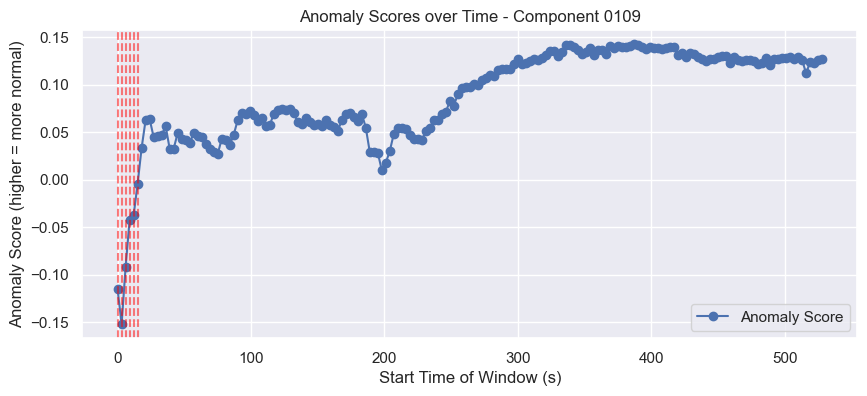

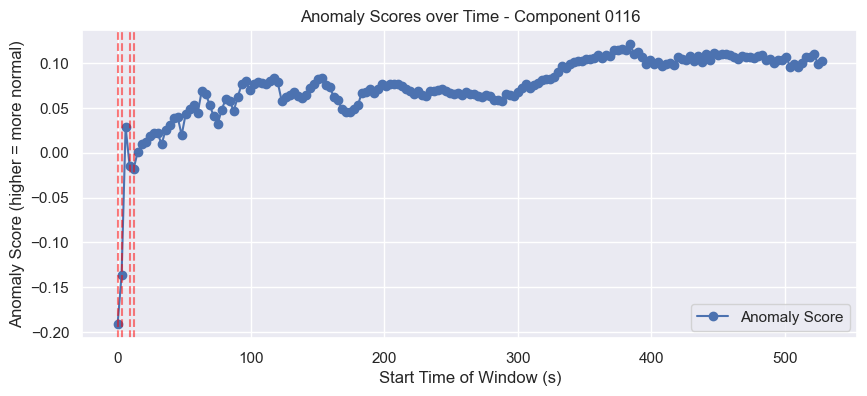

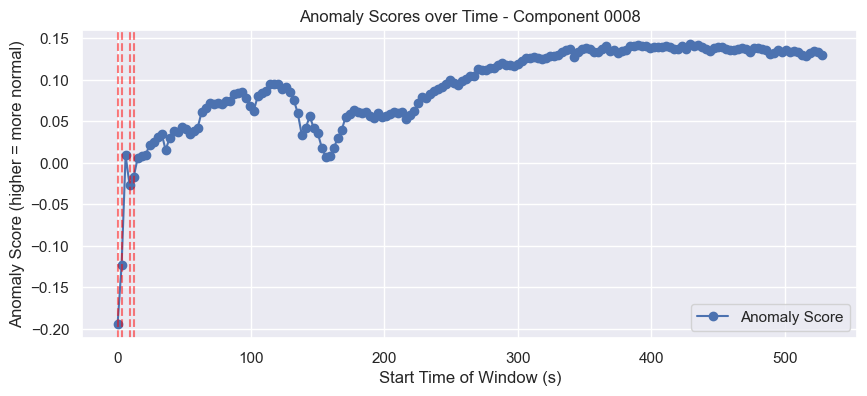

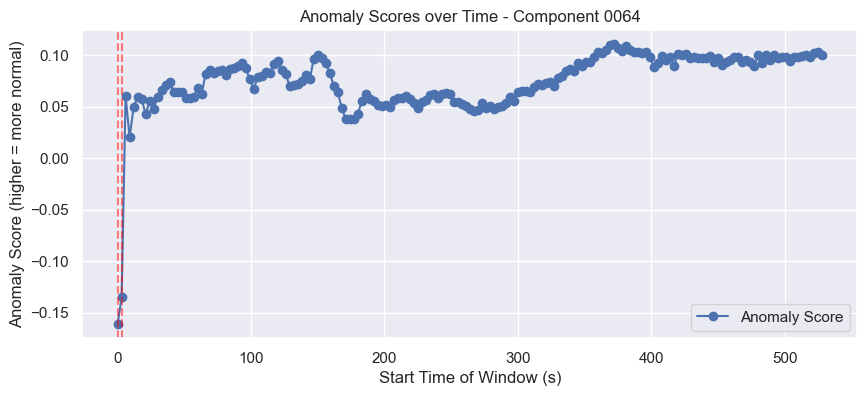

In [26]:
def plot_anomaly_scores(comp_id, summary):
    windows = summary[comp_id]
    starts = [w['start'] for w in windows]
    scores = [w['score'] for w in windows]
    is_anom = [w['anomaly'] for w in windows]

    plt.figure(figsize=(10, 4))
    plt.plot(starts, scores, marker='o', label='Anomaly Score')
    for x, anom in zip(starts, is_anom):
        if anom:
            plt.axvline(x, color='red', linestyle='--', alpha=0.5)
    plt.title(f"Anomaly Scores over Time - Component {comp_id}")
    plt.xlabel("Start Time of Window (s)")
    plt.ylabel("Anomaly Score (higher = more normal)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example:
plot_anomaly_scores('0109', summary)
plot_anomaly_scores('0116', summary)

plot_anomaly_scores('0008', summary)
plot_anomaly_scores('0064', summary)


In [1]:
#train model 3 - drop first 30 seconds from the dataframe

df_after_30_seconds=data.iloc[30:]

NameError: name 'data' is not defined